In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('./all_mtg_cards.csv')
df.legalities = df.legalities.astype(str)

C:\Users\Ang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
df.head(10)

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
5,Angelic Blessing,NaN,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,NaN,"['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,c5655330-5131-5f40-9d3e-0549d88c6e9e
6,Angelic Chorus,129710.0,normal,NaN,{3}{W}{W},5.0,['White'],['W'],Enchantment,NaN,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","['10E', 'BBD', 'USG']",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29
7,Angelic Wall,129671.0,normal,NaN,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","['10E', 'AVR', 'M14', 'ODY', 'P02']","Defender, flying (This creature can't attack, ...",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd
8,Angelic Wall,NaN,normal,NaN,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,...,NaN,"['10E', 'AVR', 'M14', 'ODY', 'P02']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,60b93108-8790-591b-844e-c3d311698767
9,Aura of Silence,132127.0,normal,NaN,{1}{W}{W},3.0,['White'],['W'],Enchantment,NaN,...,"[{'name': 'Aura des Schweigens', 'text': 'Arte...","['10E', 'C15', 'F02', 'MB1', 'PRM', 'TD0', 'WC...",Artifact and enchantment spells your opponents...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fac6ad26-f8c2-51bd-9f6a-a1b0940b4cef


#### В таблице выше видно, что в данном датасете имеются дубликаты, поэтому в первую очередь избавимся от них 

In [38]:
df_without_duplicates = df.drop_duplicates(subset = 'name') #удалим дубликаты карт по имени
df_without_duplicates #таблица без дубликатов

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
6,Angelic Chorus,129710.0,normal,NaN,{3}{W}{W},5.0,['White'],['W'],Enchantment,NaN,...,"[{'name': 'Choral der Engel', 'text': 'Immer w...","['10E', 'BBD', 'USG']",Whenever a creature comes into play under your...,Enchantment,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29
7,Angelic Wall,129671.0,normal,NaN,{1}{W},2.0,['White'],['W'],Creature — Wall,NaN,...,"[{'name': 'Mauer der Engel', 'text': 'Verteidi...","['10E', 'AVR', 'M14', 'ODY', 'P02']","Defender, flying (This creature can't attack, ...",Creature - Wall,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,fadda48c-6226-5ac5-a2b9-e9170d2017cd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66607,Spare Supplies,491905.0,normal,NaN,{2},2.0,NaN,NaN,Artifact,NaN,...,"[{'name': 'Ersatzvorräte', 'text': 'Die Ersatz...",['ZNR'],Spare Supplies enters the battlefield tapped.\...,Artifact,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,ZNR,Zendikar Rising,e51c3a28-5719-5f1f-856a-ccdadf9411e5
66608,Stonework Packbeast,491906.0,normal,NaN,{2},2.0,NaN,NaN,Artifact Creature — Beast,NaN,...,"[{'name': 'Mauerwerk-Packbestie', 'text': 'Die...",['ZNR'],"Stonework Packbeast is also a Cleric, Rogue, W...",Artifact Creature — Beast,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,ZNR,Zendikar Rising,51c154c6-a67b-56bb-9713-c2b10b936e4f
66609,Utility Knife,491907.0,normal,NaN,{1},1.0,NaN,NaN,Artifact — Equipment,NaN,...,"[{'name': 'Allzweckmesser', 'text': 'Wenn das ...",['ZNR'],"When Utility Knife enters the battlefield, att...",Artifact — Equipment,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,ZNR,Zendikar Rising,4c3776b8-e3fb-5dd9-9a6b-8bdcc6943fb2
66610,Base Camp,491908.0,normal,NaN,NaN,0.0,NaN,NaN,Land,NaN,...,"[{'name': 'Basislager', 'text': 'Das Basislage...",['ZNR'],Base Camp enters the battlefield tapped.\n{T}:...,Land,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,ZNR,Zendikar Rising,ffa1ae56-535f-51de-8455-2cd52335abee


## 1. Распределение карт по цвету в зависимости от редкости

#### За цвета карт отвечает столбец 'colors', за редкость 'rarity'. Построим сводную таблицу, чтобы показать распределение карт в зависимости от цвета.

In [39]:
t_colors = df_without_duplicates.pivot_table(index = ['colors'], columns = ['rarity'], values='name', aggfunc = 'count') #распределение карт по цвету в зависимости от рекдости
t_colors 

rarity,Common,Mythic,Rare,Special,Uncommon
colors,,,,,
"['Black', 'Blue', 'White']",5.0,17.0,19.0,NaN,9.0
"['Black', 'Blue']",41.0,29.0,83.0,NaN,91.0
"['Black', 'Green', 'Blue', 'White']",NaN,2.0,1.0,NaN,NaN
"['Black', 'Green', 'Blue']",1.0,13.0,9.0,NaN,2.0
"['Black', 'Green', 'Red', 'Blue', 'White']",NaN,17.0,15.0,NaN,3.0
"['Black', 'Green', 'Red', 'Blue']",NaN,1.0,1.0,NaN,NaN
"['Black', 'Green', 'Red', 'White']",NaN,1.0,1.0,NaN,NaN
"['Black', 'Green', 'Red']",5.0,14.0,23.0,NaN,9.0
"['Black', 'Green', 'White']",1.0,8.0,9.0,NaN,2.0


#### Поскольку одна карта может иметь от одного до пяти цветов, обобщим таблицу для большей наглядности. Сгруппируем карты в зависимости от того, какое количество цветов имеет карта

In [18]:
#функция для преобразования строки в список, чтобы удобно было считывать цвета
def convert_to_list(x):
    letters = [i for i in x if i not in "]'["]
    x = ''.join(letters)
    x = x.split(', ')
    return x

#функция для группировки цветов
def select_color_type(x):
    x = convert_to_list(x)'
    elif len(x) == 1:
        return x[0]
    elif len(x) == 2:
        return '2 colors'
    elif len(x) == 3:
        return '3 colors'
    elif len(x) == 4:
        return '4 colors'
    elif len(x) == 5:
        return '5 colors'
    
#создаем новый столбец, в котором будет написано количество цветов на карте или цвет, если он один
df_without_duplicates['color_type'] = df_without_duplicates['color_type'].apply(select_color_type) 

#создадим новую сводную таблицу уже по сгруппированным цветам
t_color_general = df_without_duplicates.pivot_table(index = 'color_type', columns = 'rarity', values='name', aggfunc = 'count')
t_color_general

C:\Users\Ang\AppData\Local\Temp/ipykernel_9672/1896541341.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_duplicates['color_type'] = df_without_duplicates['color_type'].apply(select_color_type)


rarity,Common,Mythic,Rare,Special,Uncommon
color_type,,,,,
,927.0,124.0,1296.0,2.0,1044.0
2 colors,344.0,275.0,784.0,NaN,835.0
3 colors,30.0,141.0,156.0,NaN,55.0
4 colors,NaN,8.0,5.0,NaN,NaN
5 colors,NaN,17.0,15.0,NaN,3.0
Black,1428.0,136.0,1026.0,NaN,1045.0
Blue,1403.0,135.0,1020.0,NaN,1027.0
Green,1410.0,139.0,986.0,NaN,1042.0
Red,1413.0,135.0,1011.0,2.0,1047.0


<AxesSubplot:xlabel='color_type'>

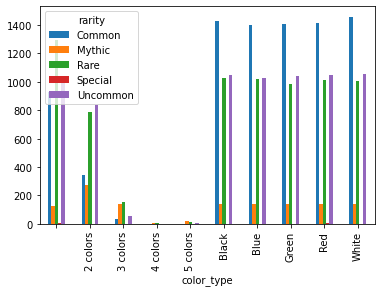

In [19]:
t_color_general.plot(kind = 'bar') #график распределения карт по цветам в зависимости от редкости

## 2. Процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт

#### Информация о том, в каких форматах могут играться карты находится в столбце 'legality'. Осуществим поиск по строке на наличие в ней значения 'Banned' для режима 'Commander'

In [103]:
#функция для поиска значения в строке
def find_commander(x):
    if "'format': 'Commander', 'legality': 'Banned'" in x:
        return 'yes'
    else:
        return 'no'
    
#создадим отдельную таблицу в которой будет содержаться информация о названии карты, ее типе и информации о формате        
commander_banned = df_without_duplicates.loc[:, ['name', 'type', 'legalities']] 

#добавим столбец 'result', в котором будет содержаться 'yes', если строка запрещена в формате Commander, и 'no', если наоборот
commander_banned['result'] = commander_banned['legalities'].apply(find_commander)

#отфильтруем строки, остатвив те, в которых значение result == 'yes'
commander_banned = commander_banned[commander_banned.result == 'yes']

k = commander_banned['name'].count() #количество карт, запрещенных в формате commander
percent = (k / df_without_duplicates['name'].count()) * 100
percent = round(percent, 2)
print(f'{percent}%') #процент карт, запрещенных в формате Commander

type_table = commander_banned.groupby(['type'])['name'].count() #распределение карт по типу 
type_table



0.36%


type
Artifact                                12
Artifact Creature — Golem                1
Conspiracy                              25
Creature — Avatar                        1
Creature — Devil                         1
Creature — Efreet                        1
Creature — Giant                         1
Creature — Horror                        1
Creature — Human Nomad                   1
Creature — Human Wizard                  1
Creature — Merfolk Pirate                1
Enchantment                              7
Enchantment — Aura                       1
Instant                                  3
Land                                     1
Legendary Artifact                       1
Legendary Artifact Creature — Scout      1
Legendary Creature — Angel               1
Legendary Creature — Demon               1
Legendary Creature — Eldrazi             1
Legendary Creature — Elemental Otter     1
Legendary Creature — Elf Advisor         1
Legendary Creature — Elf Druid           1
Legend

<AxesSubplot:xlabel='type'>

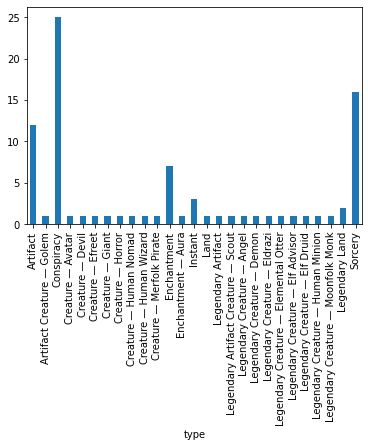

In [106]:
type_table.plot(kind = 'bar') #график распределения карт, запрещенных в формате Commander, в зависимости от их типа

## 3. Топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов

#### Поскольку карты, являющиеся землями, содержат в названии своего типа слово 'land', произведем поиск в столбце типа карты, на наличие в нем подстроки 'land'. Информация о количестве напечатанных сетов хранится в столбце 'printings'.

In [151]:
not_land = df_without_duplicates[df_without_duplicates['type'].str.lower().str.contains('land') == False] #найдем карты, не являющиеся землями
top_10 = not_land.sort_values('printings').head(10) #добавим условие по наибольшему количеству сетов
top_10['name']

89         Wrath of God
358        Giant Growth
359        Giant Spider
93        Air Elemental
238      Scathe Zombies
225           Nightmare
279         Goblin King
52        Samite Healer
438        Howling Mine
193    Drudge Skeletons
Name: name, dtype: object

## 4. Для карт, не являющихся землями, определите, какая часть из них даёт ману с помощью своего эффекта. Покажите распределение по типу маны, который дают эти карты 

#### Информация о том, дает ли карта ману и какую указана в столбце 'original_text'. Для нахождения этих карт, был произведен поиск подстрок 'add' и 'mana'. Также для нахождения типа маны, был произведен поиск подстрок с названием цвета

In [143]:
#функция для определения типа маны, которую дает карта
def find_mana_type(x):
    x = x.lower()
    if 'green' in x:
        return 'green'
    elif 'black' in x:
        return 'black'
    elif 'white' in x:
        return 'white'
    elif 'red' in x:
        return 'red'
    elif 'blue' in x:
        return 'red'
    elif 'colorless' in x:
        return 'colorless'
    elif 'any single color' or 'any color' in x:
        return 'any color'

#нахождение карт, которые дают ману    
mana = not_land[(not_land['original_text'].isnull() == False) & (not_land['original_text'].str.lower().str.contains('add')) & (not_land['original_text'].str.lower().str.contains('mana'))]    

#определение типа маны, и занесение этой информации в новый столбец 'received_mana_type'
mana['received_mana_type'] = mana['original_text'].apply(find_mana_type)

#составление распределения полученных карт по типу маны
mana_table = mana.groupby(['received_mana_type'])['name'].count()
mana_table

C:\Users\Ang\AppData\Local\Temp/ipykernel_9672/3320597077.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mana['received_mana_type'] = mana['original_text'].apply(find_mana_type)


received_mana_type
any color    555
black         17
colorless     69
green         28
red           31
white          8
Name: name, dtype: int64

<AxesSubplot:xlabel='received_mana_type'>

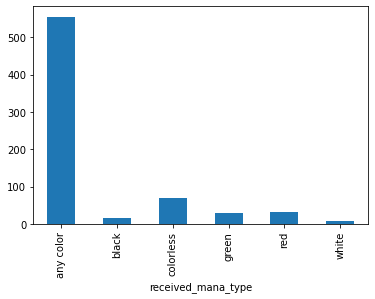

In [146]:
mana_table.plot(kind = 'bar') #график распределения карт по типу маны, которую они дают